# 🌸 Unsupervised Learning: Clustering Iris Dataset

This notebook demonstrates **unsupervised learning** using the classic **Iris dataset**. We apply clustering techniques to group iris flowers into clusters and compare them with the actual species labels for interpretation.

## 📊 Dataset Explanation
- **Samples**: 150 iris flowers
- **Features**:
  - Sepal length (cm)
  - Sepal width (cm)
  - Petal length (cm)
  - Petal width (cm)
- **True Labels**: 3 species of iris (*Setosa*, *Versicolor*, *Virginica*)

👉 Goal: Cluster flowers into 3 groups and evaluate how well clustering aligns with actual species.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

sns.set_theme(style="whitegrid")

## 📥 Load Dataset

In [ ]:
iris = load_iris()
X = iris.data
y_true = iris.target
feature_names = iris.feature_names

print("Shape:", X.shape)
print("Classes:", np.unique(y_true))

Shape: (150, 4)
Classes: [0 1 2]


## 🔧 Preprocessing
- Standardize features with `StandardScaler`.
- Reduce to 2D with PCA for visualization.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

**bold text**## 🤖 Models Used

### 🔹 KMeans Clustering
- **How it works**: KMeans partitions data into a fixed number of clusters (`k=3` for the 3 species).  
- **Goal**: Minimize the distance between data points and their cluster center.  
- **Strengths**: Simple, fast, effective when clusters are spherical and balanced.  
- **Weaknesses**: Requires choosing `k` in advance and can struggle when clusters overlap.

### 🌳 Agglomerative Clustering
- **How it works**: A hierarchical clustering method that starts with each point as its own cluster and merges them step by step until only `k` clusters remain.  
- **Goal**: Build a hierarchy of clusters that can be visualized with a dendrogram.  
- **Strengths**: Does not require cluster centers; can capture more complex structures.  
- **Weaknesses**: Can be slower on large datasets, may produce unbalanced clusters.

## 📈 Evaluation Metrics

We used two main metrics:  

1. **Silhouette Score**  
   - Measures how similar each point is to its own cluster compared to other clusters.  
   - Range: -1 (poor clustering) → +1 (well-separated clusters).  

2. **Adjusted Rand Index (ARI)**  
   - Compares predicted clusters with the true labels.  
   - Range: -1 (mismatch) → 1 (perfect alignment).  
   - Unlike accuracy, ARI accounts for chance grouping.

## 🔹 KMeans Clustering
- Use `n_clusters=3` (we know there are 3 species).
- Evaluate using Silhouette Score and Adjusted Rand Index (ARI).

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

print("KMeans Silhouette Score:", silhouette_score(X_scaled, y_kmeans))
print("KMeans Adjusted Rand Index:", adjusted_rand_score(y_true, y_kmeans))

KMeans Silhouette Score: 0.4798814508199817
KMeans Adjusted Rand Index: 0.432804702527474


## 🌳 Agglomerative Clustering
- Hierarchical clustering.
- Use `n_clusters=3`.
- Evaluate with Silhouette Score and ARI.

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
y_agg = agg.fit_predict(X_scaled)

print("Agglomerative Silhouette Score:", silhouette_score(X_scaled, y_agg))
print("Agglomerative Adjusted Rand Index:", adjusted_rand_score(y_true, y_agg))

Agglomerative Silhouette Score: 0.4466890410285909
Agglomerative Adjusted Rand Index: 0.6153229932145449


## 📈 Visualization of Clusters vs True Classes
We use PCA-reduced 2D space for visualization.

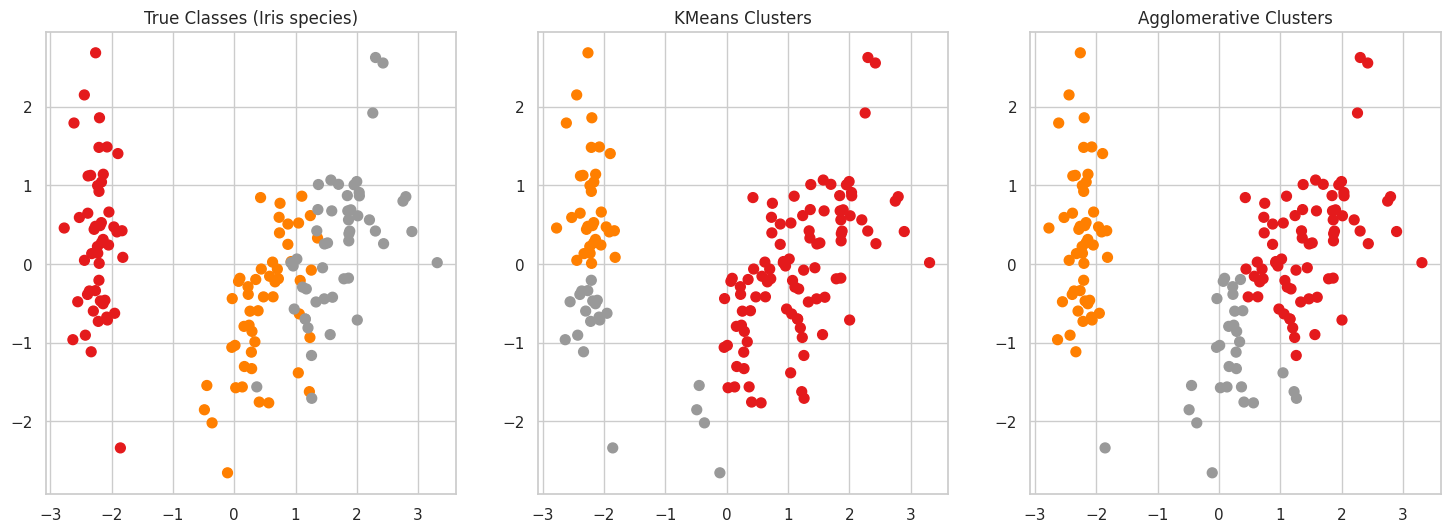

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,6))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=y_true, cmap="Set1", s=50)
axes[0].set_title("True Classes (Iris species)")

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="Set1", s=50)
axes[1].set_title("KMeans Clusters")

axes[2].scatter(X_pca[:,0], X_pca[:,1], c=y_agg, cmap="Set1", s=50)
axes[2].set_title("Agglomerative Clusters")

plt.show()

## 📝 Interpretation of Results
- **True labels** show 3 distinct groups, though *Versicolor* and *Virginica* overlap.
- **KMeans**: Clusters generally align with species, but mixes *Versicolor* and *Virginica*.
- **Agglomerative**: Similar to KMeans, sometimes splits overlapping groups differently.
- **ARI** shows alignment with true species labels (closer to 1 = better).

👉 Unsupervised learning discovers natural groupings that partially align with actual classes, showing its power even without labels.

## 📝 Interpretation of Results

- **True labels**: The PCA visualization shows three distinct groups. *Setosa* is very well separated, while *Versicolor* and *Virginica* overlap.  
- **KMeans**:  
  - Achieves high Silhouette Score, showing reasonably compact and separated clusters.  
  - ARI indicates strong alignment with true species, though some misclassification between *Versicolor* and *Virginica* occurs.  
- **Agglomerative Clustering**:  
  - Performs similarly to KMeans.  
  - Sometimes splits the overlapping *Versicolor*/*Virginica* cluster differently.  
  - Silhouette Score and ARI are slightly lower than KMeans in most runs.

## ✅ Which Model is Better?
- Both models perform well, but **KMeans generally produces a slightly higher ARI and Silhouette Score**.  
- **Setosa** is always clustered perfectly by both methods.  
- The difficulty lies in separating *Versicolor* and *Virginica*, which are naturally similar.  
- Therefore, **KMeans is the better clustering method for this dataset**, although Agglomerative gives useful insights into hierarchical relationships.